# Classification of Finance Consumer Complaints using Multinomial Naïve Bayes

### Problem Statement

This lab aims to Classify Consumer Finance Complaints into 12 pre-defined classes
Given a new complaint comes in, we want to assign it to one of 12 categories. The classifier makes the assumption that each new complaint is assigned to one and only one category. This is multi-class text classification problem.


### Data Exploration

In [ ]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

For this project, we need only two columns — “Product” and “Consumer complaint narrative”. <br>
Input: Consumer_complaint_narrative<br>
Example: “ I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements”<br>
Output: product

Example: Credit reporting<br>
We will remove missing values in “Consumer complaints narrative” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.

### Clean Up

Remove missing values in “Consumer complaints narrative” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings

In [2]:
from io import StringIO

col = ['product', 'consumer_complaint_narrative']

df = df[col]

In [3]:
df = df[pd.notnull(df['consumer_complaint_narrative'])]
df.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [4]:
df.columns = ['Product', 'consumer_complaint_narrative']

In [5]:
df['category_id'] = df['Product'].factorize()[0]

In [6]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [7]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


### Imbalanced Classes

We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Debt collection, Credit reporting and Mortgage.

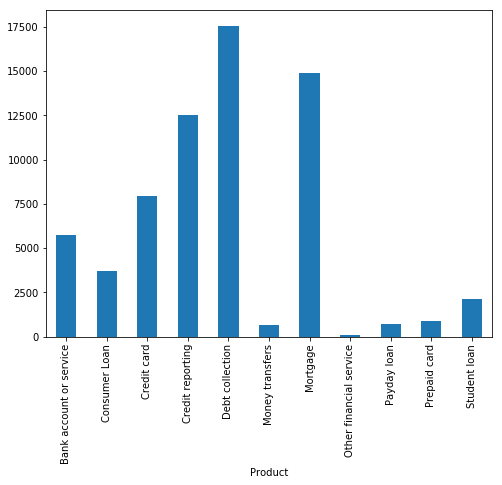

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
df.groupby('Product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

### Feature Engineering

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [11]:
features = tfidf.fit_transform(df['consumer_complaint_narrative'])

In [12]:
print(df.category_id.shape)
print(features.shape)

(66806,)
(66806, 159200)


### Model Development and Evaluation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [14]:
# split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, df.category_id, random_state = 0)

In [15]:
# train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### After fitting the training set, let’s make some predictions

In [16]:
print(classifier.predict(tfidf.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

[0]


Category 0 means Debt collection

### Predict labels for test data

In [17]:
y_pred = classifier.predict(X_test)

### Print evaluation metrics

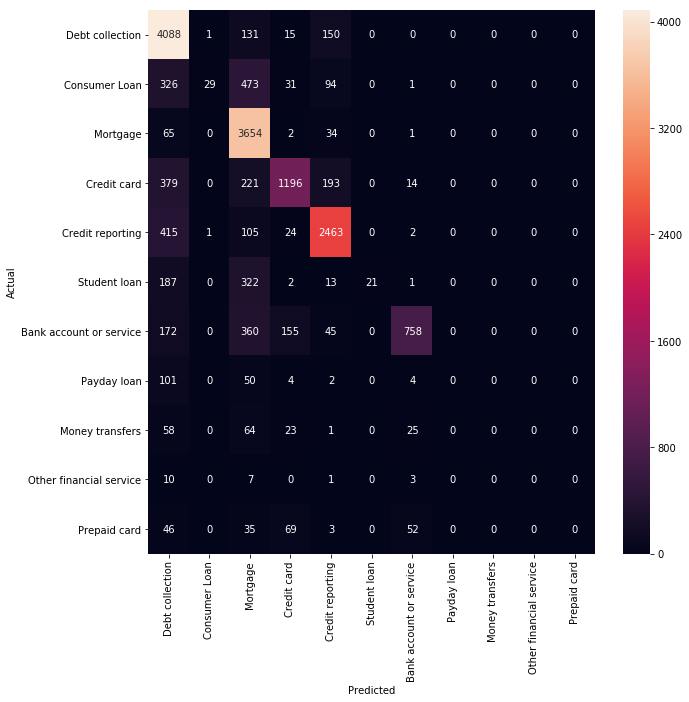

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Comparison With Other Classifiers

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svc = LinearSVC()

In [20]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [21]:
y_pred = svc.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.86      0.90      0.88      4385
          Consumer Loan       0.82      0.66      0.73       954
               Mortgage       0.93      0.96      0.95      3756
            Credit card       0.83      0.84      0.84      2003
       Credit reporting       0.87      0.89      0.88      3010
           Student loan       0.95      0.85      0.90       546
Bank account or service       0.85      0.80      0.83      1490
            Payday loan       0.63      0.35      0.45       161
        Money transfers       0.77      0.61      0.68       171
Other financial service       1.00      0.10      0.17        21
           Prepaid card       0.74      0.76      0.75       205

              micro avg       0.87      0.87      0.87     16702
              macro avg       0.84      0.70      0.73     16702
           weighted avg       0.87      0.87      0.87     16702



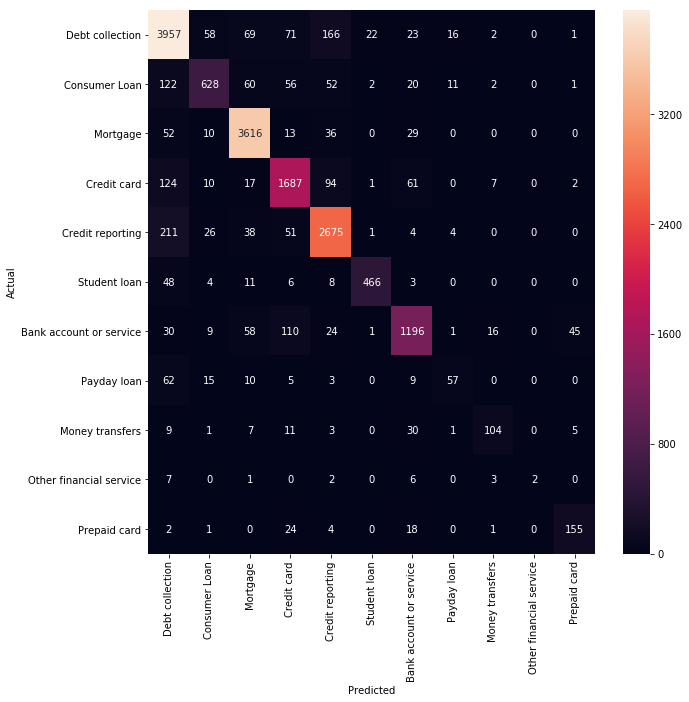

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()